In [78]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# import warnings
# warnings.filterwarnings("ignore")

In [79]:
data = load_breast_cancer()
X, y = data['data'], data['target']

In [80]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

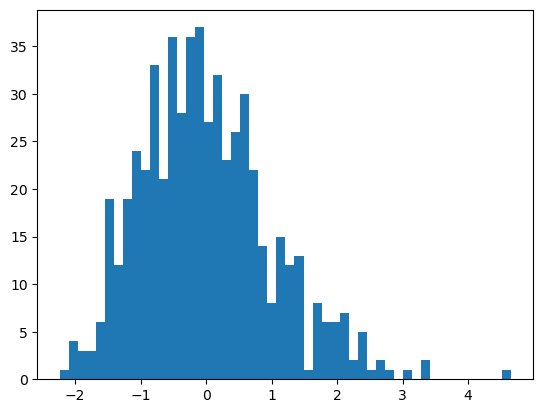

In [81]:
plt.hist(X_norm[:,1], 50);

In [82]:
X.shape, y.shape

((569, 30), (569,))

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [84]:
model = LogisticRegression(max_iter = 100)
model.fit(X_train, y_train)
print('The model is trained!')

The model is trained!


In [85]:
y_pred = model.predict(X_test)

In [86]:
y_pred, y_test

(array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 0]),
 array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 0]))

In [87]:
accuracy = ((y_test - y_pred) == 0).sum() / len(y_test) * 100
print(f'The accuracy is {accuracy:.2f} %')

The accuracy is 97.37 %


In [88]:
from sklearn import metrics

In [89]:
metrics.confusion_matrix(y_test, y_pred)

array([[41,  2],
       [ 1, 70]])

In [90]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(41, 2, 1, 70)

In [91]:
70 / (70 + 1)

0.9859154929577465

In [92]:
def classification_metrics(target, pred):
    tn, fp, fn, tp = metrics.confusion_matrix(target, pred).ravel()
    acc = (tn + tp) / (tn + fp +fn + tp)
    sen = tp / (tp + fn)
    spc = tn / (tn + fp)
    prc = tp / (tp + fp)
    return acc, sen, spc, prc

In [93]:
classification_metrics(y_test, y_pred)

(0.9736842105263158,
 0.9859154929577465,
 0.9534883720930233,
 0.9722222222222222)

In [94]:
metrics.recall_score(y_test, y_pred)

0.9859154929577465

In [95]:
prob = model.predict_proba(X_test)[:,1]
metrics.roc_auc_score(y_test, prob)

0.99737962659679

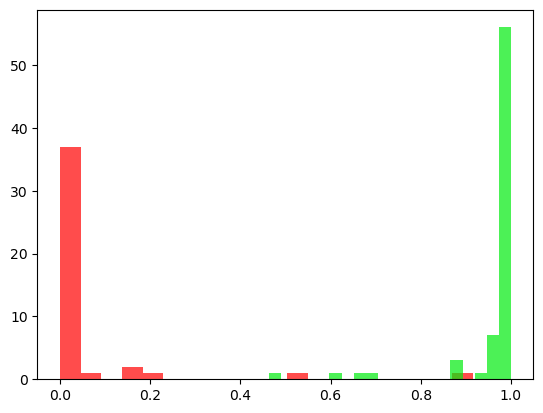

In [96]:
plt.hist(prob[y_test == 0], bins = 20, color = "#FF0000", alpha = .7);
plt.hist(prob[y_test == 1], bins = 20, color = "#00EC0E", alpha = .7);

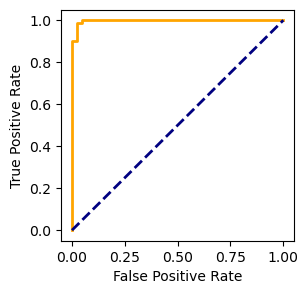

In [107]:
# Plot the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob)

# Plot the ROC curve
plt.figure(figsize=(3, 3))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
plt.show()

In [108]:
model.coef_, model.intercept_

(array([[-0.43464701, -0.39719369, -0.39606985, -0.46999027, -0.06739432,
          0.52671658, -0.80767618, -1.1077114 ,  0.24153785,  0.07844689,
         -1.25057276,  0.1889927 , -0.58988574, -0.91987672, -0.31656977,
          0.66906627,  0.17107672, -0.31431731,  0.50499861,  0.61176062,
         -0.87394431, -1.35751246, -0.58604724, -0.83803013, -0.54737794,
          0.00589749, -0.95168648, -0.78040785, -1.19559714, -0.16293183]]),
 array([0.32857199]))